In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv('./height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


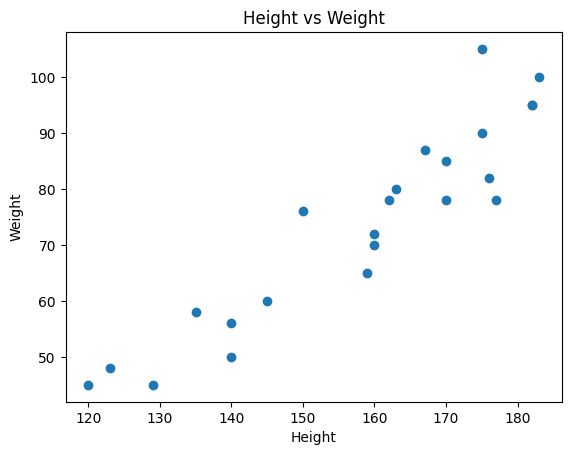

In [4]:
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.show()

In [5]:
## Dependent and Independent Variables
X = df[['Height']]
y = df['Weight']

X.head()

,Height
0,120
1,135
2,123
3,145
4,160


In [6]:
## Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
## Training the model
from sklearn.linear_model import ElasticNetCV
model = ElasticNetCV(cv=5, random_state=0)


In [8]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
## Fitting the model
model.fit(X_train_scaled, y_train)

ElasticNetCV(cv=5, random_state=0)

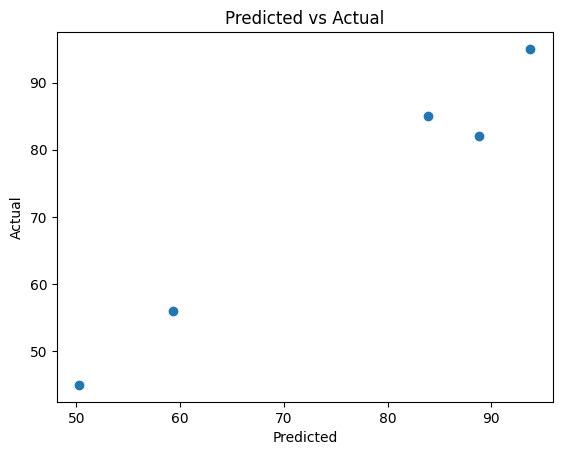

In [11]:
y_pred = model.predict(X_test_scaled)

## Plotting the model
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual')
plt.show()

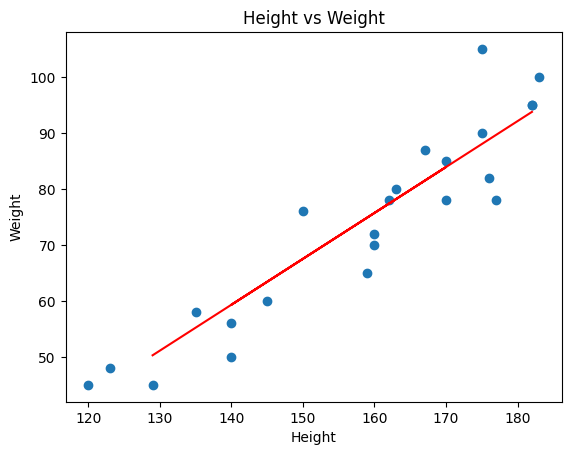

In [17]:
#Show best fit line
plt.scatter(X, y)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.show()

In [21]:
print('Model Coefficient:', model.coef_[0])
print('Model Intercept:', model.intercept_)

Model Coefficient: 15.182601206164094
Model Intercept: 74.16666666666667


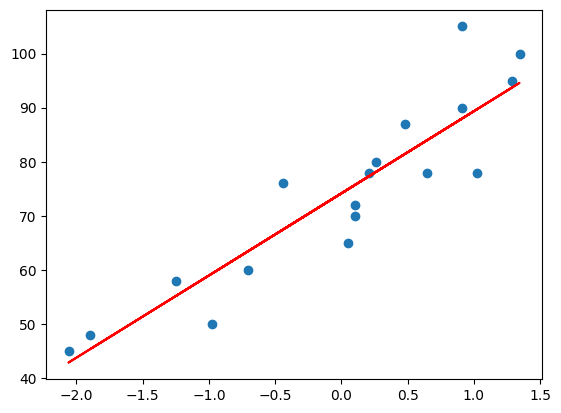

In [24]:
plt.scatter(X_train_scaled, y_train)
plt.plot(X_train_scaled, model.predict(X_train_scaled), color='red')

In [25]:
model.predict(scaler.transform([[70]]))

/Users/sankalp/Desktop/Machine Learning bootcamp/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1.90992823])

In [26]:
from sklearn.metrics import r2_score

In [27]:
score=r2_score(y_test, y_pred)

In [30]:
print(f'Accuracy : {score *100}%')

Accuracy : 95.03322919663233%


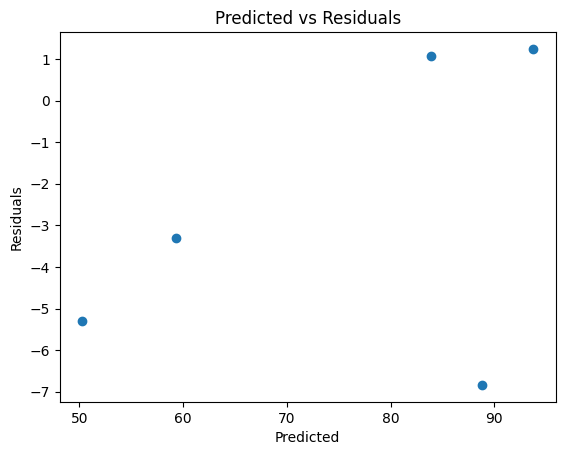

In [31]:
#plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')
plt.show()